In [5]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.1 MB/s eta 0:00:00


In [1]:
import pandas as pd
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("/content/merge_from_ofoct.csv")

In [4]:
df.head(10)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,Intermark Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/296470579/,Москва,sale,flat,3,15,3,104.0,-1,0,65200000,Аэропорт,Ленинградский проспект,36с39,Динамо,ВТБ Арена парк
1,GRAND ESTATE - Премиальная недвижимость,real_estate_agent,https://www.cian.ru/sale/flat/300539749/,Москва,sale,flat,8,8,3,81.0,-1,0,50000000,Арбат,Арбат,51С1,Смоленская,NaN
2,Intermark Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/295370167/,Москва,sale,flat,2,6,3,110.5,-1,0,99000000,Пресненский,Малая Бронная,32,Пушкинская,NaN
3,Monumental Group,real_estate_agent,https://www.cian.ru/sale/flat/300006012/,Москва,sale,flat,8,8,3,81.0,-1,0,50000000,Арбат,Арбат,51С1,Смоленская,NaN
4,Century 21 Street Realty,real_estate_agent,https://www.cian.ru/sale/flat/300822468/,Москва,sale,flat,5,21,3,116.8,-1,0,120000000,Пресненский,2-я Звенигородская,16,Улица 1905 года,Lucky
5,ID 85604823,unknown,https://www.cian.ru/sale/flat/299433436/,Москва,sale,flat,6,15,3,100.0,-1,0,50000000,Пресненский,Шмитовский проезд,39к8,Шелепиха,Headliner
6,ID 413522,realtor,https://www.cian.ru/sale/flat/301735001/,Москва,sale,flat,5,21,3,116.78,-1,0,120000000,Пресненский,2-я Звенигородская,16,Улица 1905 года,Lucky
7,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/279871964/,Москва,sale,flat,7,10,3,190.0,-1,0,139000000,Басманный,Нижняя Красносельская,35С50,Бауманская,TriBeCa APARTMENTS
8,BERI,real_estate_agent,https://www.cian.ru/sale/flat/300567591/,Москва,sale,flat,4,5,3,83.4,-1,0,34990000,Хамовники,Смоленский бульвар,17С1,Смоленская,NaN
9,MHEstate - Элитная недвижимость,real_estate_agent,https://www.cian.ru/sale/flat/301559691/,Москва,sale,flat,2,4,3,140.0,-1,0,227351780,Мещанский,Рождественский бульвар,10/7С1,Трубная,NaN


In [5]:
df= df.dropna()

In [13]:
df = df[df['floors_count'] != 'floors_count']
df = df[df['floor'] != 'floor']
df = df[df['rooms_count'] != 'rooms_count']

In [14]:
X = df.drop(['price',"author","url","house_number", "location","deal_type","accommodation_type", "price_per_month","commissions"], axis=1)
y = df['price']

In [15]:
X.columns

Index(['author_type', 'floor', 'floors_count', 'rooms_count', 'total_meters',
       'district', 'street', 'underground', 'residential_complex'],
      dtype='object')

In [23]:
df

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,Intermark Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/296470579/,Москва,sale,flat,3,15,3,104.0,-1,0,65200000,Аэропорт,Ленинградский проспект,36с39,Динамо,ВТБ Арена парк
4,Century 21 Street Realty,real_estate_agent,https://www.cian.ru/sale/flat/300822468/,Москва,sale,flat,5,21,3,116.8,-1,0,120000000,Пресненский,2-я Звенигородская,16,Улица 1905 года,Lucky
5,ID 85604823,unknown,https://www.cian.ru/sale/flat/299433436/,Москва,sale,flat,6,15,3,100.0,-1,0,50000000,Пресненский,Шмитовский проезд,39к8,Шелепиха,Headliner
6,ID 413522,realtor,https://www.cian.ru/sale/flat/301735001/,Москва,sale,flat,5,21,3,116.78,-1,0,120000000,Пресненский,2-я Звенигородская,16,Улица 1905 года,Lucky
7,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/279871964/,Москва,sale,flat,7,10,3,190.0,-1,0,139000000,Басманный,Нижняя Красносельская,35С50,Бауманская,TriBeCa APARTMENTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6129,Лобстер Групп,real_estate_agent,https://www.cian.ru/sale/flat/301109499/,Москва,sale,flat,13,21,3,112.2,-1,0,122800000,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
6130,RND,real_estate_agent,https://www.cian.ru/sale/flat/297505502/,Москва,sale,flat,8,11,3,144.0,-1,0,122400000,Дорогомилово,Кутузовский проспект,12,Киевская,Кутузовский XII
6131,АпартСити,real_estate_agent,https://www.cian.ru/sale/flat/301703350/,Москва,sale,flat,74,85,3,190.0,-1,0,130000000,Пресненский,1-й Красногвардейский проезд,21с2,Деловой центр,МФК ОКО
6133,MUST HAVE BURO,real_estate_agent,https://www.cian.ru/sale/flat/301123534/,Москва,sale,flat,3,10,3,104.0,-1,0,140000000,Пресненский,Малый Кисловский переулок,3,Арбатская,Рахманинов


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
df['floor'] = df['floor'].astype(int)
df['floors_count'] = df['floors_count'].astype(int)
df['rooms_count'] = df['rooms_count'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2585 entries, 0 to 6134
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   author               2585 non-null   object
 1   author_type          2585 non-null   object
 2   url                  2585 non-null   object
 3   location             2585 non-null   object
 4   deal_type            2585 non-null   object
 5   accommodation_type   2585 non-null   object
 6   floor                2585 non-null   int64 
 7   floors_count         2585 non-null   int64 
 8   rooms_count          2585 non-null   int64 
 9   total_meters         2585 non-null   object
 10  price_per_month      2585 non-null   object
 11  commissions          2585 non-null   object
 12  price                2585 non-null   object
 13  district             2585 non-null   object
 14  street               2585 non-null   object
 15  house_number         2585 non-null   object
 16  underground

In [19]:
cat_features = ['author_type', 'district','street','underground','residential_complex' ]
model = CatBoostRegressor( cat_features=cat_features)
model.fit(X_train, y_train)

Learning rate set to 0.044651
0:	learn: 74326777.0346656	total: 51.8ms	remaining: 51.8s
1:	learn: 72303197.4732346	total: 56.1ms	remaining: 28s
2:	learn: 70409167.1999317	total: 61.1ms	remaining: 20.3s
3:	learn: 68555760.8642773	total: 65.3ms	remaining: 16.2s
4:	learn: 66563885.2623249	total: 69.8ms	remaining: 13.9s
5:	learn: 64751317.2283432	total: 74.6ms	remaining: 12.4s
6:	learn: 63167455.7626699	total: 80.2ms	remaining: 11.4s
7:	learn: 61576076.3624899	total: 84.6ms	remaining: 10.5s
8:	learn: 59960823.5070148	total: 88.9ms	remaining: 9.79s
9:	learn: 58444785.4067805	total: 93.2ms	remaining: 9.23s
10:	learn: 57024185.5474693	total: 96.8ms	remaining: 8.7s
11:	learn: 55689925.8804606	total: 102ms	remaining: 8.39s
12:	learn: 54564050.6358388	total: 105ms	remaining: 7.95s
13:	learn: 53237247.4556866	total: 109ms	remaining: 7.66s
14:	learn: 52074307.6685738	total: 114ms	remaining: 7.47s
15:	learn: 51064200.5315370	total: 118ms	remaining: 7.26s
16:	learn: 50212119.3332303	total: 121ms	rem

In [20]:
importances = model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()

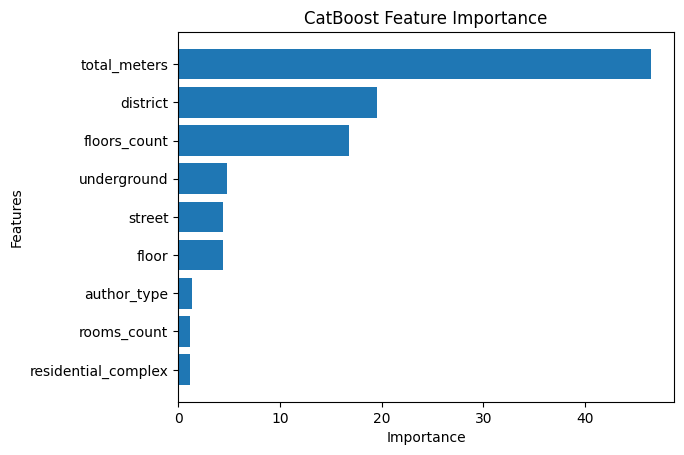

In [21]:
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [22]:
feature_importances.index

Index(['residential_complex', 'rooms_count', 'author_type', 'floor', 'street',
       'underground', 'floors_count', 'district', 'total_meters'],
      dtype='object')